In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing

In [3]:
data = pd.read_csv('Hotel Reservations.csv')

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
data.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
data.shape

(36275, 19)

In [7]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
#replacing the missing or the null values

data.fillna(0, inplace = True)
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
for i in data.columns:
    print(type(data[i].iloc[0]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'str'>


Relations and the other data provided amd presenting it graphically: 

In [10]:
data['no_of_adults'].value_counts(dropna=False)

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

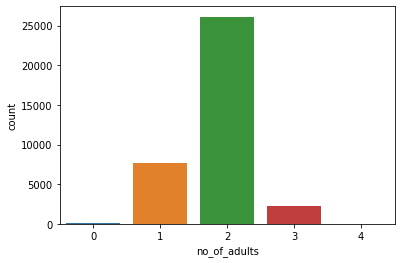

In [11]:
sns.countplot(x='no_of_adults',data=data)
plt.show()

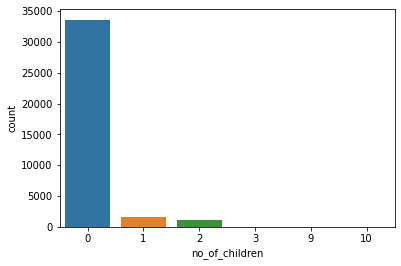

In [12]:
sns.countplot(x='no_of_children',data=data)
plt.show()

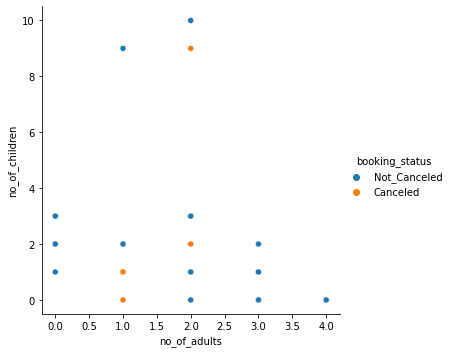

In [13]:
sns.relplot(x='no_of_adults',y='no_of_children',hue = 'booking_status',data=data)
plt.show()

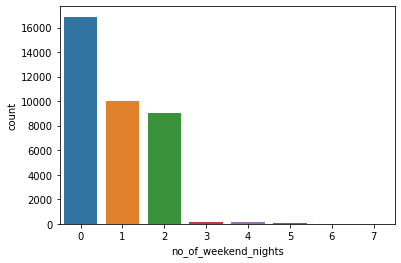

In [14]:
sns.countplot(x='no_of_weekend_nights',data=data)
plt.show()

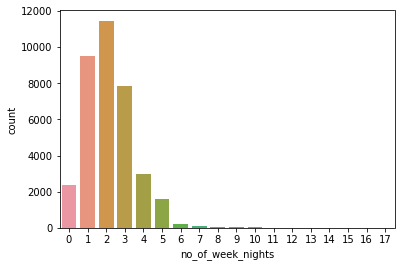

In [15]:
sns.countplot(x='no_of_week_nights',data=data)
plt.show()

In [16]:
data['type_of_meal_plan'].value_counts(dropna=False)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

array([<AxesSubplot: ylabel='count'>], dtype=object)

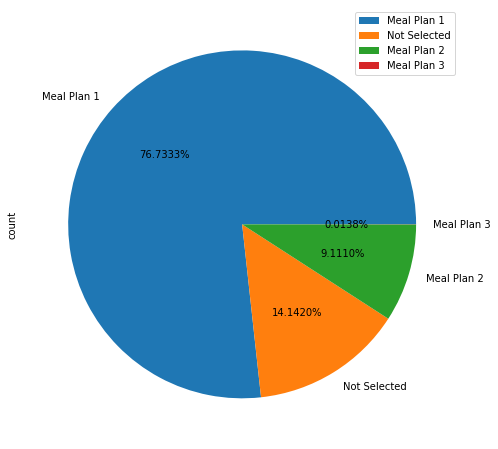

In [17]:
data.groupby('type_of_meal_plan')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.4f%%',subplots=True,figsize=(8,8))

In [18]:
data['room_type_reserved'].value_counts(dropna=False)

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [19]:
data['arrival_year']=data['arrival_year'].apply(str)
data['arrival_month']=data['arrival_month'].apply(str)
data['arrival_date']=data['arrival_date'].apply(str)

In [20]:
# merging the dates
data['arrival_new_date']=data[['arrival_date','arrival_month','arrival_year']].agg('-'.join, axis=1)

In [21]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_new_date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2-10-2017
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,6-11-2018
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,28-2-2018
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,20-5-2018
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,11-4-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,3-8-2018
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,17-10-2018
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,1-7-2018
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,21-4-2018


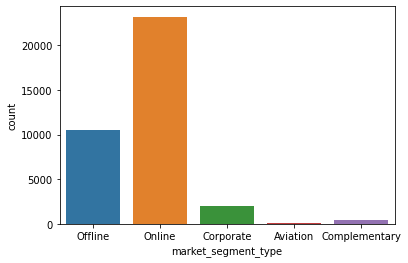

In [22]:
sns.countplot(x='market_segment_type',data=data)
plt.show()

In [23]:
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [24]:
data['target']=np.where(data['booking_status'].isin(['Canceled']),1,0)

In [25]:
data['target'].mean()

0.32763611302549966

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32848\2439578410.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")


<AxesSubplot: >

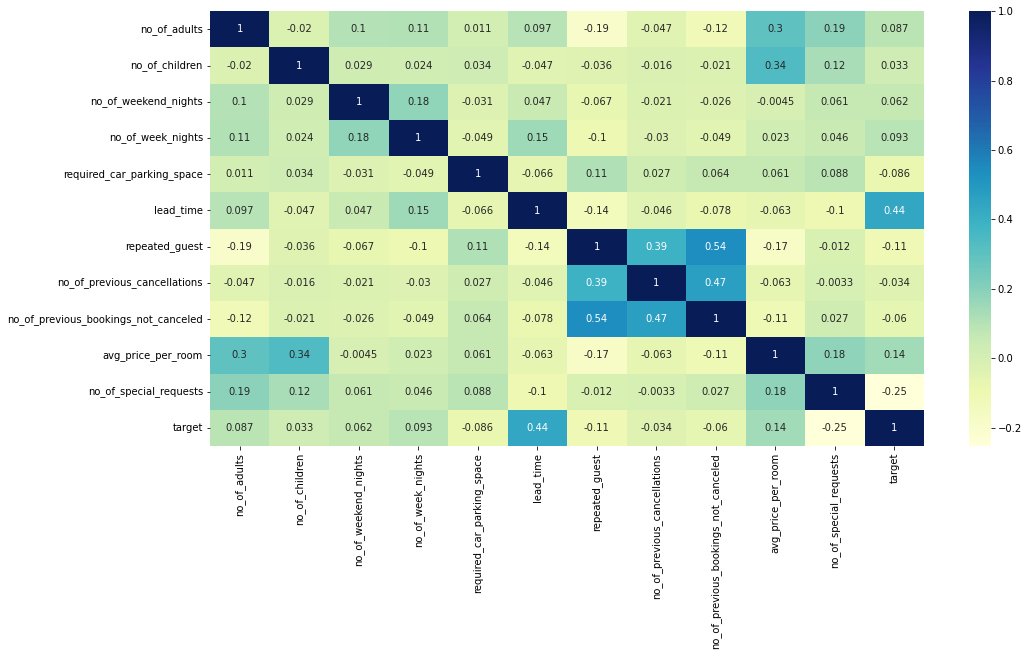

In [26]:
#correlation of matrix

plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

In [27]:
# correlation of the data

data.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32848\3227716678.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,target
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,-0.192277,-0.047426,-0.119166,0.296886,0.189401,0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,-0.036348,-0.016390,-0.021189,0.337728,0.124486,0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,-0.099764,-0.030080,-0.049344,0.022753,0.045994,0.092996
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.110909,0.027106,0.063810,0.061304,0.087922,-0.086185
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,0.438538
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,1.000000,0.390810,0.539156,-0.174900,-0.011820,-0.107287
no_of_previous_cancellations,-0.047426,-0.016390,-0.020690,-0.030080,0.027106,-0.045723,0.390810,1.000000,0.468147,-0.063340,-0.003317,-0.033728
no_of_previous_bookings_not_canceled,-0.119166,-0.021189,-0.026312,-0.049344,0.063810,-0.078137,0.539156,0.468147,1.000000,-0.113684,0.027377,-0.060179
avg_price_per_room,0.296886,0.337728,-0.004525,0.022753,0.061304,-0.062596,-0.174900,-0.063340,-0.113684,1.000000,0.184381,0.142569


In [28]:
# Replacig the values with '0's and '1's

data['booking_status'].replace(['Canceled','Not_Canceled'],[1,0],inplace=True)
data.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_new_date,target
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,0,2-10-2017,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,0,6-11-2018,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,1,28-2-2018,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,1,20-5-2018,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,1,11-4-2018,1


In [29]:
for cols in data:
    print(cols + ':')
    print(data[cols].unique())

Booking_ID:
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
no_of_adults:
[2 1 3 0 4]
no_of_children:
[ 0  2  1  3 10  9]
no_of_weekend_nights:
[1 2 0 4 3 6 5 7]
no_of_week_nights:
[ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
type_of_meal_plan:
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
required_car_parking_space:
[0 1]
room_type_reserved:
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead_time:
[224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 

In [30]:
# putting new labels to few columns

from sklearn.preprocessing import LabelEncoder

data_cols=['type_of_meal_plan','room_type_reserved','market_segment_type','arrival_new_date']

In [31]:
for i in data_cols:
    data[i]=LabelEncoder().fit_transform(data[i])

In [32]:
# dropping unneccessary features

data.drop(['Booking_ID','arrival_new_date','arrival_date'],axis=1,inplace=True)

In [33]:
data.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,target
0,2,0,1,2,0,0,0,224,2017,10,3,0,0,0,65.00,0,0,0
1,2,0,2,3,3,0,0,5,2018,11,4,0,0,0,106.68,1,0,0
2,1,0,2,1,0,0,0,1,2018,2,4,0,0,0,60.00,0,1,1
3,2,0,0,2,0,0,0,211,2018,5,4,0,0,0,100.00,0,1,1
4,2,0,1,1,3,0,0,48,2018,4,4,0,0,0,94.50,0,1,1


In [34]:
data.shape     # re-evaluating the dataset

(36275, 18)

Printing the best choice to find the accuracy values:

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
x=data.iloc[:,0:16]
y = data.iloc[:,-1]

In [37]:
best = SelectKBest(score_func=chi2,k=3)

In [38]:
fit = best.fit(x,y)

In [39]:
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)

In [40]:
feat_scores = pd.concat([data_columns,data_scores],axis=1)
feat_scores.columns = ['Features','SCORE']
feat_scores.sort_values(by='SCORE')

,Features,SCORE
8,arrival_year,0.085364
9,arrival_month,5.810592
0,no_of_adults,39.967573
6,room_type_reserved,52.981056
4,type_of_meal_plan,55.117965
1,no_of_children,61.119279
10,market_segment_type,87.735975
2,no_of_weekend_nights,128.539472
12,no_of_previous_cancellations,239.758035
5,required_car_parking_space,261.098182


Training and testing the dataset:

In [41]:
x = data.iloc[:,:16]
y= data['booking_status']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29020, 16), (7255, 16), (29020,), (7255,))

Logistic Regression for prediction:

In [44]:
lreg = LogisticRegression()
lreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
lreg.score(x_train,y_train)

0.8001722949689869

In [46]:
lreg.score(x_test,y_test)

0.8020675396278428

In [47]:
y_pred=lreg.predict(x_test)
print(x_test)
print(y_pred)

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
4968              2               1                     1                  0   
34540             2               0                     1                  2   
36108             2               0                     2                  2   
1553              2               0                     0                  3   
24974             2               1                     0                  2   
...             ...             ...                   ...                ...   
35781             2               0                     0                  3   
12257             2               0                     0                  2   
27212             2               0                     0                  2   
28097             2               0                     1                  2   
6556              1               0                     1                  0   

       type_of_meal_plan  required_car_

In [50]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('ACCURACY: ',metrics.accuracy_score(y_test,y_pred))
print('PRECISION: ',metrics.precision_score(y_test,y_pred,zero_division=1))
print('CL REPORT: ',metrics.classification_report(y_test,y_pred,zero_division=1))

ACCURACY:  0.8020675396278428
PRECISION:  0.7544132917964693
CL REPORT:                precision    recall  f1-score   support

           0       0.82      0.90      0.86      4839
           1       0.75      0.60      0.67      2416

    accuracy                           0.80      7255
   macro avg       0.79      0.75      0.76      7255
weighted avg       0.80      0.80      0.80      7255



ROC curve:

In [51]:
y_pred_p=lreg.predict_proba(x_test)[::,1]

In [52]:
false_pos_rate,true_pos_rate,_=metrics.roc_curve(y_test,y_pred_p)

In [53]:
auc = metrics.roc_auc_score(y_test,y_pred_p)

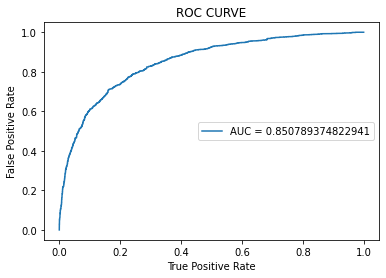

In [54]:
plt.plot(false_pos_rate,true_pos_rate,label="AUC = "+str(auc))
plt.title('ROC CURVE')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend(loc=5)

In [55]:
print(confusion_matrix(y_test,y_pred))

[[4366  473]
 [ 963 1453]]
